In [82]:
import numpy as np

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [85]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values


In [86]:
from sklearn.cross_validation import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc_x=StandardScaler()

In [90]:
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [91]:
from sklearn.svm import SVC

In [92]:
classifier=SVC(kernel='rbf',random_state=0)

In [93]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
y_pred=classifier.predict(X_test)

In [95]:
print('Accuracy is :',classifier.score(X_test,y_test))

Accuracy is : 0.93


In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
cm=confusion_matrix(y_test,y_pred)

In [98]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [99]:
#visualization:
from matplotlib.colors import ListedColormap

In [100]:
X_set,y_set=X_train,y_train

In [101]:
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

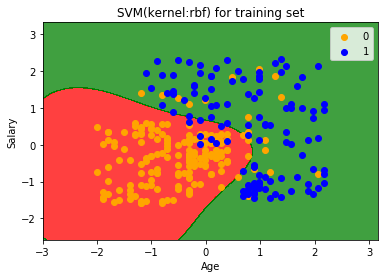

In [102]:
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('SVM(kernel:rbf) for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [103]:
X_set,y_set=X_test,y_test

In [104]:
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

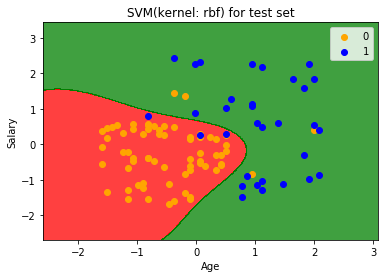

In [105]:
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('SVM(kernel: rbf) for test set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()